# Working with Synthesis AI face dataset landmarks

At first, we install some dependencies.

Installing `face_api_dataset` from the github it it's not already installed.

In [1]:
%%bash

(python -c "import face_api_dataset")
if [ $? -eq 0 ]
then
    echo "face_api_dataset is already installed"
else
    echo "installing face_api_dataset from github"
    pip install git+https://github.com/Synthesis-AI-Dev/face_api_dataset.git
fi

face_api_dataset is already installed


Installing `git lfs` from the github it it's not already installed.

In [2]:
%%bash

(git lfs install > /dev/null)
if [ $? -eq 0 ]
then
    echo "git lfs is already installed"
else
    echo "installing git lfs"
    case "$(uname -s)" in

       Darwin)
         brew install git-lfs
         ;;

       Linux)
         curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
         apt-get install git-lfs
         ;;

       *)
         echo "This cell can't install git lfs your OS. Please take care of it yourself."
         ;;
    esac
fi

git lfs is already installed


Pulling the test dataset for the example

In [3]:
%%bash

if [ -d "../test_dataset" ]
then
    echo "test_dataset is already present"
else
    echo "downloading test_dataset"
    git clone https://github.com/Synthesis-AI-Dev/face_api_dataset
    mv face_api_dataset/test_dataset ..
    rm -rf face_api_dataset
fi

test_dataset is already present


Finally we add some imports for the visualisation.

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

We use `FaceApiDataset` class to access synthesis datasets.


In [6]:
from face_api_dataset import FaceApiDataset, Modality

**Warning!** Some of modalities requires additional libraries to be installed:
`SEGMENTS` and `RGB` modalities use `opencv-python` library,
 while `DEPTH`, `ALPHA` and `NORMALS` modalities
 use `tiffile`  and `imagecodecs` libraries for effective work with floating point tiff files.
 If dataset with these modalities will be created without corresponding libraries present, an `ImportError` is raised.


In [7]:
data_root = "../test_dataset"
dataset = FaceApiDataset(data_root,
                        modalities=[Modality.RGB, Modality.LANDMARKS_IBUG68, Modality.LANDMARKS_CONTOUR_IBUG68,
                                    Modality.LANDMARKS_COCO, Modality.LANDMARKS_KINECT_V2, Modality.LANDMARKS_MEDIAPIPE,
                                    Modality.LANDMARKS_MPEG4
                                   ])

The only required parameter is dataset root. By default all the modailities are loaded.

In [8]:
len(dataset)

12

There are 16 items in the test dataset. Let's explore them closer.

In [9]:
item = dataset[0]
item2 = dataset[1]

Each item is a dict with different modalities as keys.

In [10]:
print(item.keys())

dict_keys([<Modality.RGB: 2>, <Modality.LANDMARKS_IBUG68: 7>, <Modality.LANDMARKS_CONTOUR_IBUG68: 8>, <Modality.LANDMARKS_KINECT_V2: 9>, <Modality.LANDMARKS_MEDIAPIPE: 10>, <Modality.LANDMARKS_COCO: 11>, <Modality.LANDMARKS_MPEG4: 12>])


Landmarks are in iBUG format. Each of 68 landmarks is represented by its `x` and `y` coordinates in image space,
`y` coordinate going from top to bottom.

In [11]:
def landmark_show(img, landmarks, radius=2, labels=True, font_scale=0.25):
    l_img = np.copy(img)
    for name, (x, y) in landmarks.items():
        int_p = (int(x), int(y))
        cv2.circle(l_img, int_p, radius=radius, color=(255, 0, 0), thickness=cv2.FILLED)
        if labels:
            l_img = cv2.putText(l_img, str(name), int_p, cv2.FONT_HERSHEY_SIMPLEX,
                                font_scale, (0, 255, 0), 1, cv2.LINE_AA)

    plt.imshow(l_img)

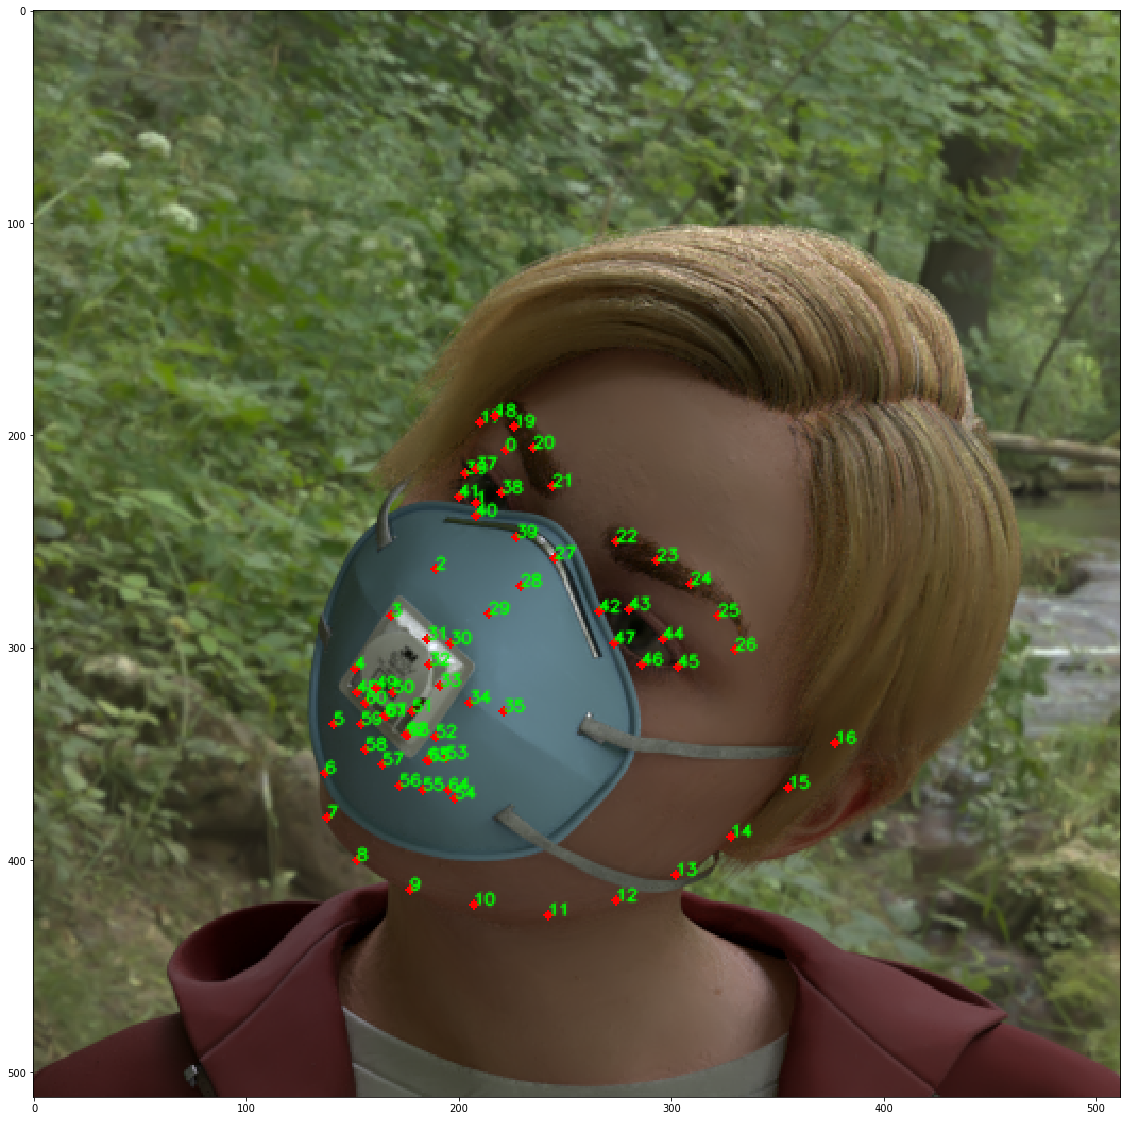

In [12]:
plt.figure(figsize=(20,20))
landmark_show(item[Modality.RGB], item[Modality.LANDMARKS_IBUG68])

**Warning!** Contour landmarks are slightly different from iBUG.
Instead of showing the contour of the face in our dataset they have the fixed position on the face.

This looks a bit strange on rotated images, but these landmarks are more useful for multiple tasks,
such as facial pose retrival and special effects.

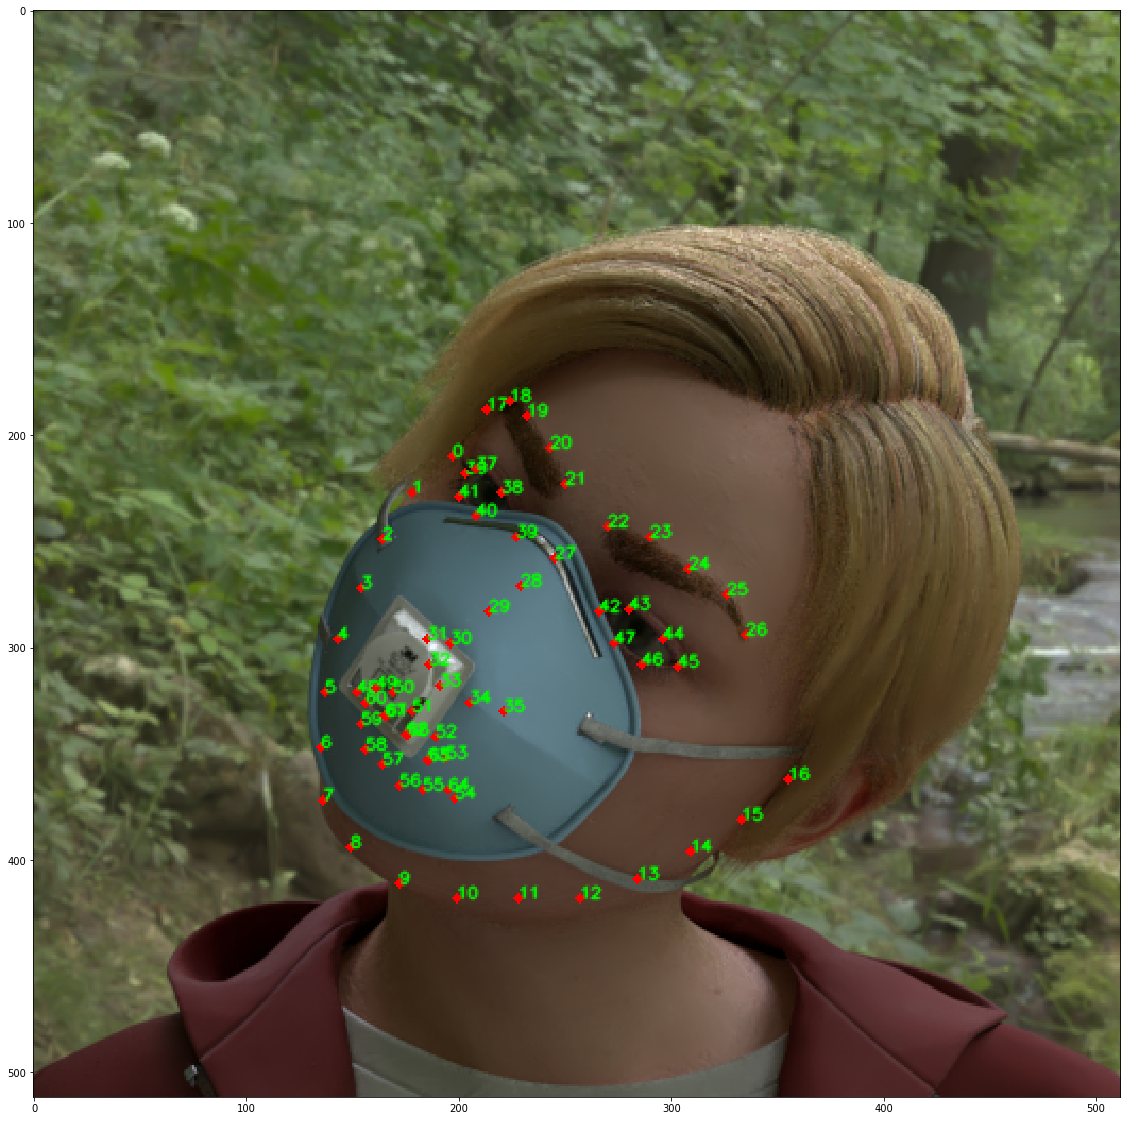

In [13]:
plt.figure(figsize=(20,20))
landmark_show(item[Modality.RGB], item[Modality.LANDMARKS_CONTOUR_IBUG68])

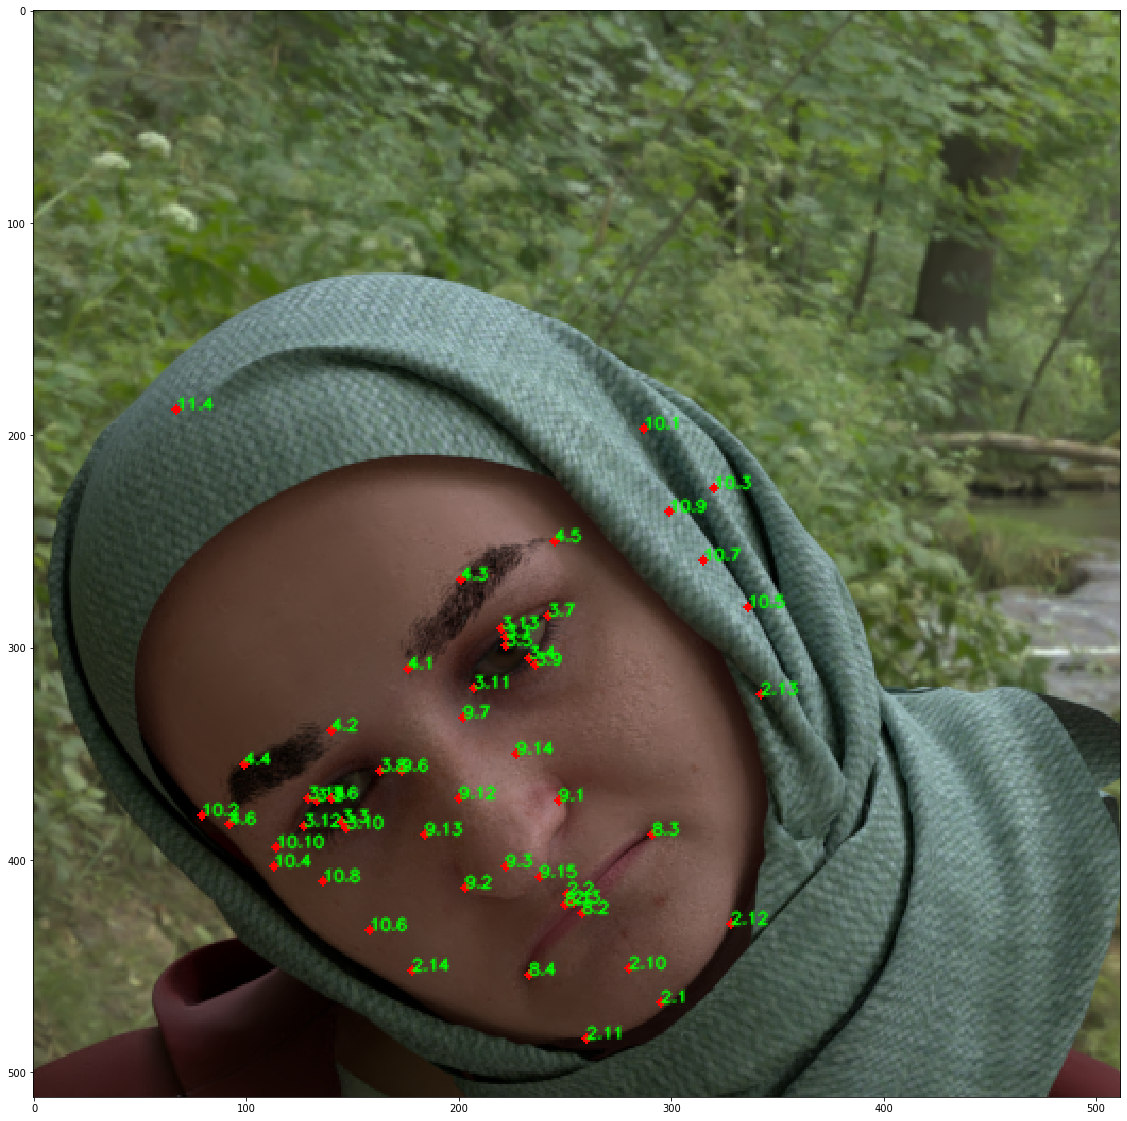

In [14]:
plt.figure(figsize=(20,20))
landmark_show(item2[Modality.RGB], item2[Modality.LANDMARKS_MPEG4])

In [15]:
item6 = dataset[6]
item7 = dataset[7]

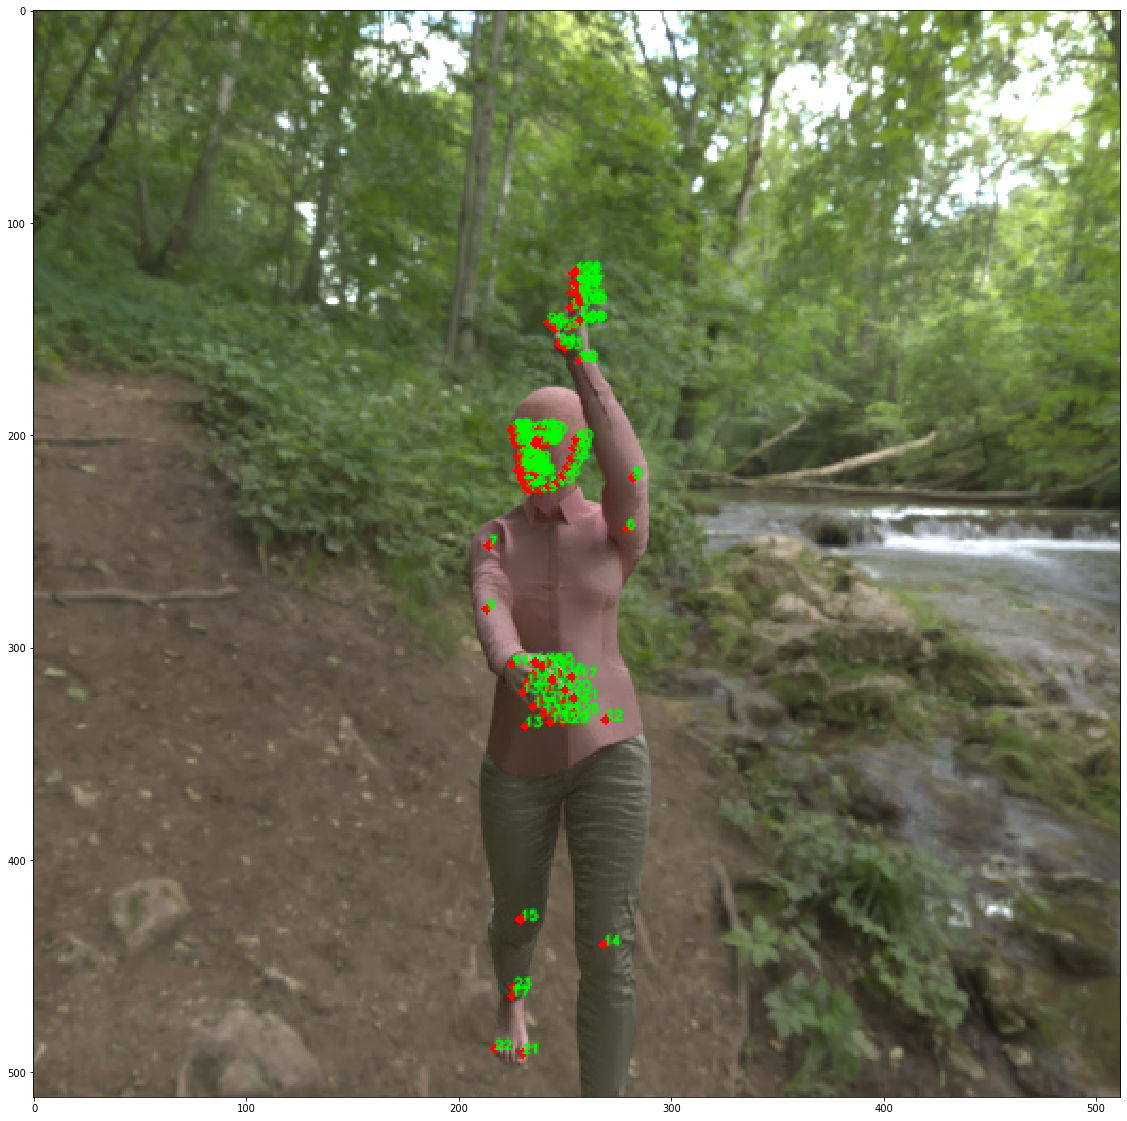

In [16]:
plt.figure(figsize=(20,20))
landmark_show(item6[Modality.RGB], item6[Modality.LANDMARKS_COCO], font_scale=0.2)

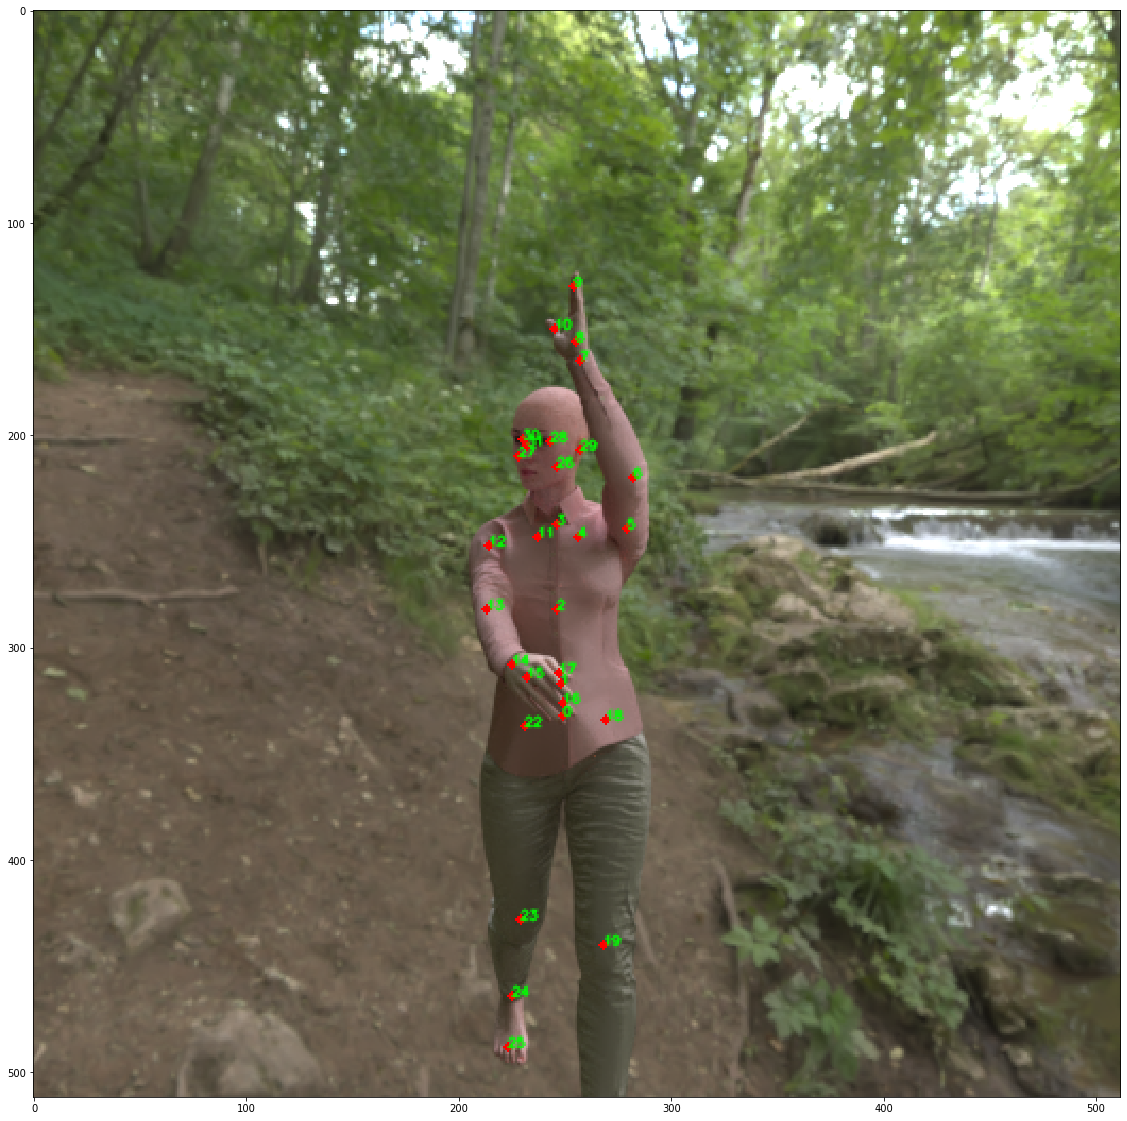

In [17]:
plt.figure(figsize=(20,20))
landmark_show(item6[Modality.RGB], item6[Modality.LANDMARKS_KINECT_V2], font_scale=0.2)

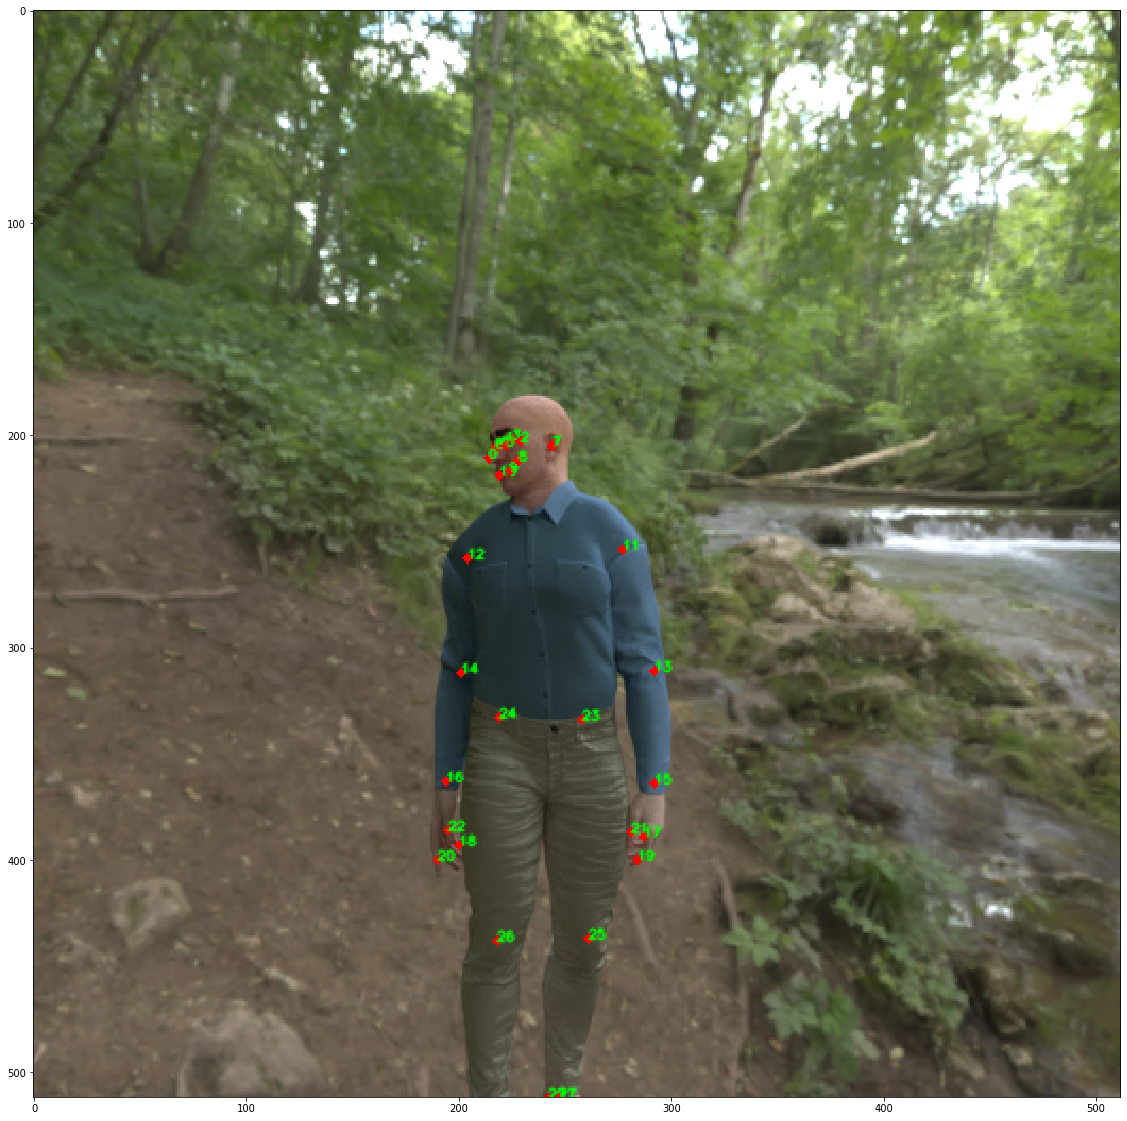

In [18]:
plt.figure(figsize=(20,20))
landmark_show(item7[Modality.RGB], item7[Modality.LANDMARKS_MEDIAPIPE], font_scale=0.2)